In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as spa
import scipy.sparse.linalg as spalg
from mpl_toolkits import mplot3d

In [2]:
N = 100
M = 100
dx = 1/float(N)
dy = 1/float(M)
A_diag = np.eye(N-1)*(-2.0/(dx**2)-2.0/(dy**2))
A_diag = A_diag + np.diag(np.ones((1,N-2))[0], 1)/(dx**2) + np.diag(np.ones((1,N-2))[0],-1)/(dx**2)

In [3]:
np.ones((1,N-2)).shape

(1, 98)

In [4]:
A_diag

array([[-40000.,  10000.,      0., ...,      0.,      0.,      0.],
       [ 10000., -40000.,  10000., ...,      0.,      0.,      0.],
       [     0.,  10000., -40000., ...,      0.,      0.,      0.],
       ...,
       [     0.,      0.,      0., ..., -40000.,  10000.,      0.],
       [     0.,      0.,      0., ...,  10000., -40000.,  10000.],
       [     0.,      0.,      0., ...,      0.,  10000., -40000.]])

In [5]:
A_off = np.eye(N-1)/(dx**2)

In [6]:
A = np.zeros(((N-1)*(N-1),(N-1)*(N-1)))

In [7]:
A.shape

(9801, 9801)

In [8]:
for i in range(0,N-1): 
    A[i*(N-1):i*(N-1)+(N-1),i*(N-1):i*(N-1)+(N-1)] = A_diag

In [9]:
for i in range(1, N-1):
    A[(i-1)*(N-1):(i-1)*(N-1)+(N-1),i*(N-1):i*(N-1)+(N-1)] = A_off
    A[i*(N-1):i*(N-1)+(N-1),(i-1)*(N-1):(i-1)*(N-1)+(N-1)] = A_off

In [10]:
v_top = 100
v_bot = -100

In [49]:
f = np.zeros((1,(N-1)*(N-1))).T
def set_boundary_conditions(u_init):
    for i in range(0,N-1): 
        u_init[(N-2) + i*(N-1) ] = v_top
    for i in range(0,N-1):
        u_init[i*(N-1)] = v_bot
    return u_init

In [50]:
u_start = set_boundary_conditions(f)

In [51]:
np.reshape(u_start,((N-1),(N-1)))

array([[-100.,    0.,    0., ...,    0.,    0.,  100.],
       [-100.,    0.,    0., ...,    0.,    0.,  100.],
       [-100.,    0.,    0., ...,    0.,    0.,  100.],
       ...,
       [-100.,    0.,    0., ...,    0.,    0.,  100.],
       [-100.,    0.,    0., ...,    0.,    0.,  100.],
       [-100.,    0.,    0., ...,    0.,    0.,  100.]])

## Full matrix (w/ zeros)

In [241]:
u_spar.shape

(9801,)

In [242]:
u = np.linalg.solve(-A,f)

In [19]:
u_new = np.reshape(u,((N-1), (N-1)))

NameError: name 'u' is not defined

In [244]:
u.shape

(9801, 1)

## Sparse matrix

In [60]:
A_spar = spa.csc_matrix(A) 
u_spar = spalg.spsolve(-A_spar,u_start)

In [61]:
u_newspar = np.reshape(u_spar,((N-1), (N-1)))

In [83]:
A[N-1,0:(N-1)].shape
u_start[N-1:(N-1)].shape

(0, 1)

In [87]:
np.dot(A[N-1,0:(N-1)], u_start[0:(N-1)])

array([-1000000.])

In [55]:
## Apply Laplace operator:
for i in range(0,100000+1): 
    u_start = u_start + (dx**2)*.1*A_spar.dot(u_start)
    u_start = set_boundary_conditions(u_start)


In [34]:
u_end = np.reshape(u_start,((N-1),(N-1)))

In [56]:
x = np.arange(0,N-1)
y = np.arange(0,N-1)
X,Y = np.meshgrid(x,y)

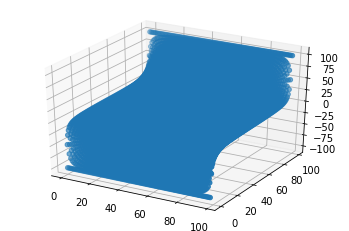

In [59]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X,Y,u_end.T)

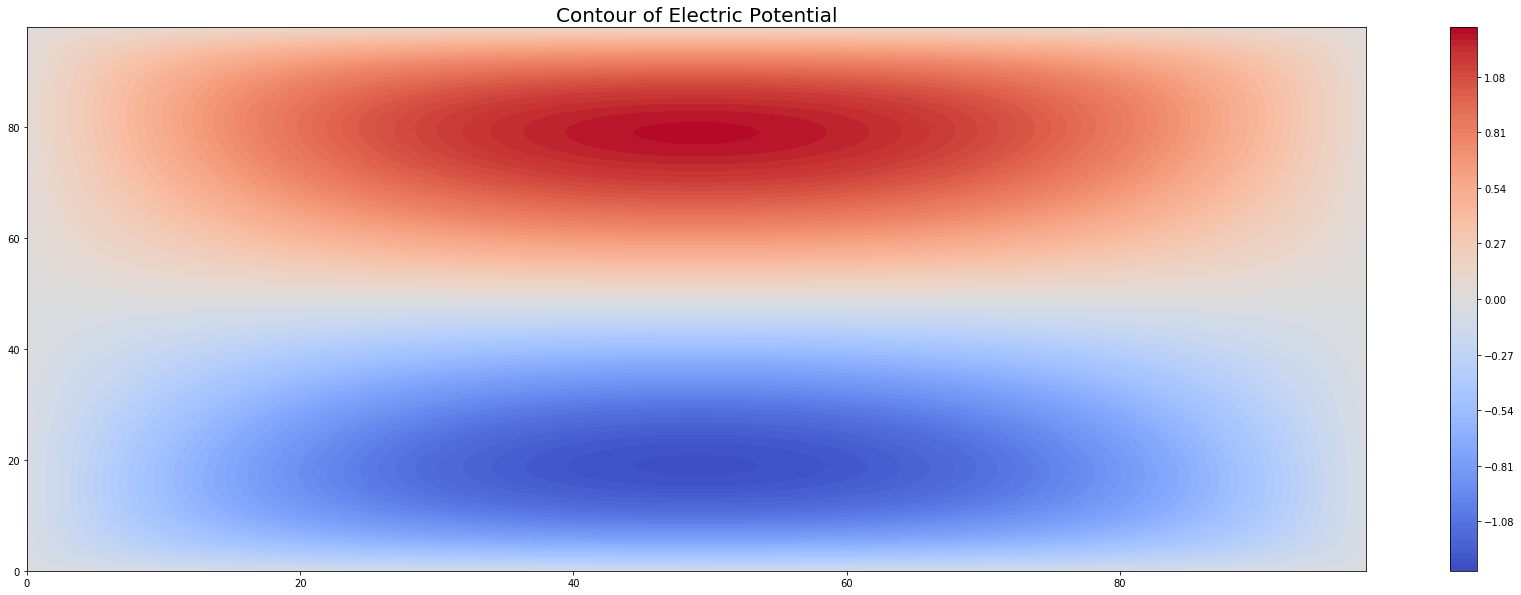

In [62]:
#Set interpolation and colormap
colorinterp = 100
colormap = plt.cm.coolwarm
figure = plt.figure(figsize=(30,10))
plt.contourf(X,Y,u_newspar.T, colorinterp, cmap=colormap)
plt.title("Contour of Electric Potential", fontsize=20)
#Set Colorbar
plt.colorbar()
#Show the result in the plot winow
plt.show()
print("")